Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [29]:
NICKNAME = "Goshaan4k"

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [30]:
def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """
    u_i = f(x)
    u_iplus1 = f(x + h)
    u_iplus2 = f(x + 2 * h)
    fder = (- 3 * u_i + 4 * u_iplus1 - u_iplus2) / (2 * h)
    return fder 

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [31]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


YOUR ANSWER HERE

In [32]:
#Порядок аппроксимации O(h^2), погрешность же стремится к нулю при уменьшении шага разности

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [33]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

In [36]:
def two_step_deriv(x, h):
    u_iminus1 = f(x - h)
    u_iplus1 = f(x + h)

    fder = (u_iplus1 - u_iminus1) / (2 * h)
    return fder

def three_step_deriv(x, h):
    u_i = f(x)
    u_iplus1 = f(x + h)
    u_iplus2 = f(x + 2 * h)

    fder = (- 3 * u_i + 4 * u_iplus1 - u_iplus2) / (2 * h)
    return fder 

x = 1

print('Результаты для двух и трех- точечных схем:')
print()
print()
print('two-step scheme'.center(15, ' '), 'three-step scheme'.center(15, ' '), sep=' | ')
print()
for h in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
    deriv_2step = two_step_deriv(x, h)
    deriv_3step = three_step_deriv(x, h)
    
    print("%.e -- %7.5g" % (h, deriv_2step), "%.e -- %7.5g" % (h, deriv_3step))
print()

print()

print('Результаты ошибки для двух- и трех- точечных схем:')
print()
print()
print('two-step scheme'.center(17, ' '), 'three-step scheme'.center(17, ' '), sep=' | ')
print()
for h in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
    deriv_2step = two_step_deriv(x, h)
    deriv_3step = three_step_deriv(x, h)
    
    print("%.e -- %.2e" % (h, deriv_2step - fder(1)), "%.e -- %.2e" % (h, deriv_3step - fder(1)))
print()

Результаты для двух и трех- точечных схем:


two-step scheme | three-step scheme

1e-01 --  1.0033 1e-01 -- 0.99379
1e-02 --       1 1e-02 -- 0.99993
1e-03 --       1 1e-03 --       1
1e-04 --       1 1e-04 --       1
1e-05 --       1 1e-05 --       1
1e-06 --       1 1e-06 --       1
1e-07 --       1 1e-07 --       1
1e-08 --       1 1e-08 --       1


Результаты ошибки для двух- и трех- точечных схем:


 two-step scheme  | three-step scheme

1e-01 -- 3.34e-03 1e-01 -- -6.21e-03
1e-02 -- 3.33e-05 1e-02 -- -6.62e-05
1e-03 -- 3.33e-07 1e-03 -- -6.66e-07
1e-04 -- 3.33e-09 1e-04 -- -6.67e-09
1e-05 -- 3.43e-11 1e-05 -- -4.90e-11
1e-06 -- -2.64e-11 1e-06 -- -1.94e-10
1e-07 -- 2.88e-11 1e-07 -- 1.69e-09
1e-08 -- -5.26e-10 1e-08 -- -1.72e-08



In [37]:
#Как видно из данных, ошибка перестает падать при h примерно 10^-6  

### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [38]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


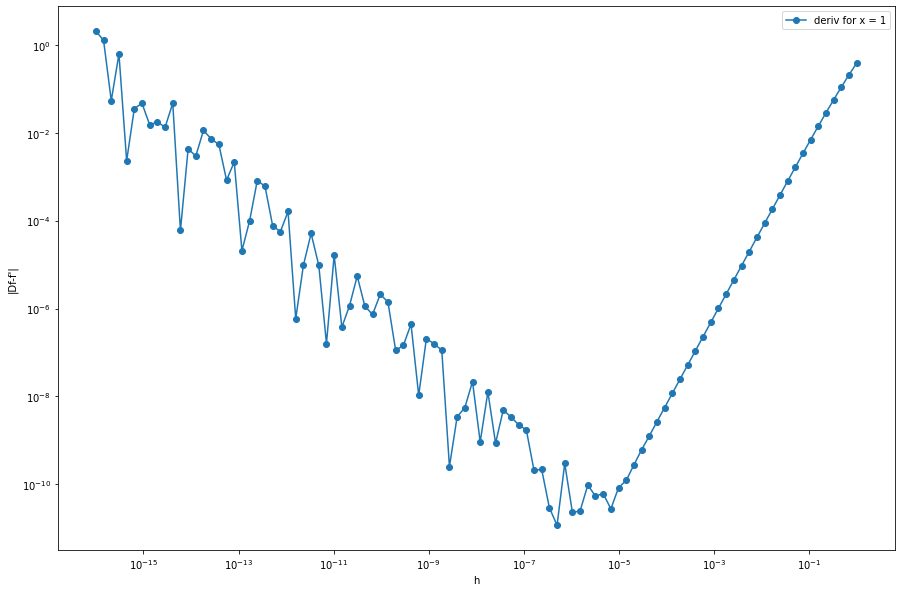

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x = 1
h_arr = np.logspace(-16, 0, num=100)
df_forward_arr = np.array([])

for h in h_arr:
    df_forward_arr = np.append(df_forward_arr, np.abs(deriv(f, x, h) - fder(x)))

plt.figure(figsize=(15, 10))
plt.loglog(h_arr, df_forward_arr, 'o-', label=f'deriv for x = {x}')
plt.xlabel("h")
plt.ylabel("|Df-f'|")
plt.legend()
plt.show()

YOUR ANSWER HERE

In [51]:
#Рассмотрим зависимость ошибки от шага, в нуле - линейный спад, в других же точках порядок 10^-6.
#При слишком больших шагах будет преобладать второе слагаемое (ошибка в приближении), при слишком маленьких - первое (ошибка в округлении)

# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [52]:
def midpoint_rule(func, a, b, eps):
    """ Вычисляет интеграл f от a до b используя правило центральной точки.
    
    Parameters
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Returns
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    n : int
        The number of intervals on segment.
    """
    n = 1
    q_n = func((a + b) / 2) * (b - a)
    q_2n = (func((a + (a + b) / 2) / 2) + func(((a + b) / 2 + b) / 2)) * (b - a) / 2
    while abs(q_2n - q_n) >= eps:
        n += 1

        h = (b - a) / n
        i = np.arange(1, n + 1)
        q_n = (func((i - 0.5) * h) * h).sum()

        h = (b - a) / (2 * n)
        i = np.arange(1, 2 * n + 1)
        q_2n = (func((i - 0.5) * h) * h).sum()

    integral = q_n 
    return integral, n

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


Численное интегрирование дало ответ 8.986686390532546, при количестве интервалов: 13



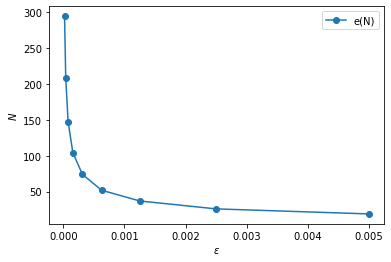

In [44]:
import matplotlib.pyplot as plt

f = lambda x: x ** 2
k = 2
result, n = midpoint_rule(f, 0, 3, 10 ** (-k))
# the real answer is 9
print(f'Численное интегрирование дало ответ {result}, при количестве интервалов: {n}')
print()

eps_list = []
N_list = []
for k in range(1, 10):
  eps = 0.01 / 2 ** k
  result, n = midpoint_rule(f, 0, 3, eps)

  eps_list.append(eps)
  N_list.append(n)

plt.plot(eps_list, N_list, '-o', label=r'e(N)')
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$N$')
plt.legend()
plt.show()

YOUR ANSWER HERE

In [53]:
#Аналитичекое решение интеграла от x^2 на (0, 3) - 9, с помощью функции 8.986686390532546, что практически укладывается в интервал заданной ошибки (8.99, 9.01)
#Скорость сходимости O(1/N^2)

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [54]:
import numpy as np

a = 0
b = 1
eps = 1e-4

f_t = lambda t: 2 * np.sin(t) / t
result, n = midpoint_rule(f_t, a, b, eps)
print(f'Прямое вычисление с заменой переменных дало результат: {result}, при количестве интервалов: {n}')

f = lambda x: 2 + np.sin(np.sqrt(x)) / x - 1 / np.sqrt(x)
result, n = midpoint_rule(f, a, b, eps)
print(f'Вычисление с вычитанием сингулярности дало результат: {result}, при количестве интервалов: {n}')

Прямое вычисление с заменой переменных дало результат: 1.8922941998480554, при количестве интервалов: 14
Вычисление с вычитанием сингулярности дало результат: 1.8920193180026728, при количестве интервалов: 16


In [55]:
#Для вычисления определеннного интеграла методом вычитания сингуляроности потребовалось больше интервалов (а значит и шагов) для достижения заданной точности

# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

YOUR ANSWER HERE

In [56]:
#Дамс, писать это ручками вот так, дело не из простых, обсудим алгоритм:
# 1) Особые точки - 0, 1, составим комбинацию f, g = 1/sqrt(x(1-x)), h = x/sqrt(x(1-x)), их приделы константы (не бесконечности)
# 2) L = af + bg + ch, где допустим a=1, взяв пределы в сингулярностях и разложив экспоненту в ряд, получим систему
# 3) Решив систему получаем b=-1, с=1-e, откуда запишем исходный интегра через L, bg и ch
# 4) Интегра равен сумме интеграла от L(x)dx, который доопределяется с помощью пределов, и (1+e)pi/2

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [57]:
def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """
    def f(x):
      if x == 0 or x == 1:
        return 0
      return  (e ** x - 1 + (1 - e) * x) / sqrt(x * (1 - x))

    n = npts - 1
    h = (1 - 0) / n
    not_not_I= sum([f(i * h) for i in range(1, n)])
    not_I = h * ((f(0) + f(1)) / 2 + not_not_I)

    return not_I + pi * (1 + e) / 2

In [58]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
